In [7]:
import numpy as np
import pandas as pd
from scipy import stats

import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
%matplotlib inline

import sklearn
import imblearn as imb
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler, LabelEncoder, MinMaxScaler
from sklearn.metrics import plot_confusion_matrix
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import f1_score, recall_score, precision_score, confusion_matrix
from sklearn.metrics import r2_score, roc_auc_score, roc_curve, classification_report
from sklearn.ensemble import RandomForestClassifier

from collections import Counter
import warnings
warnings.filterwarnings('ignore')

In [8]:
df = pd.read_csv("heart_failure_clinical_records_dataset.csv")
train = pd.read_csv("train_set.csv")
test = pd.read_csv("test_set.csv")

In [4]:
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


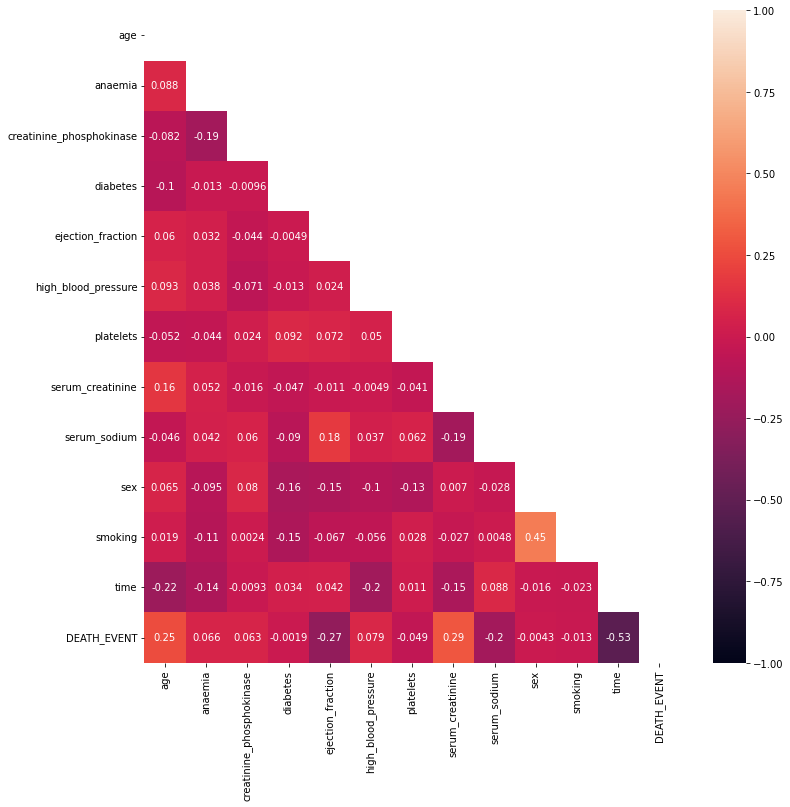

In [5]:
plt.figure(figsize=(12,12))
mask = np.triu(np.ones_like(df.corr()), k=0) 
sns.heatmap(df.corr(), annot=True, mask = mask, vmin=-1., vmax=1.)
pass

[0.08661613 0.01385509 0.08276034 0.01406785 0.12253437 0.01314759
 0.07861198 0.14662296 0.07979303 0.01129762 0.0124261  0.33826695]


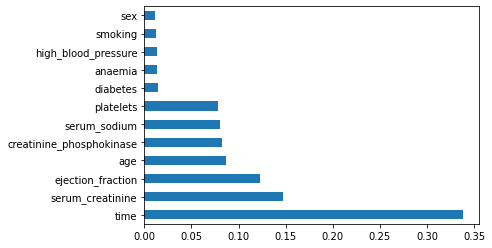

In [6]:
x = df.drop(columns='DEATH_EVENT')
y = df['DEATH_EVENT']

model = RandomForestClassifier()
model.fit(x,y)
print(model.feature_importances_)
feat_importances = pd.Series(model.feature_importances_, index=x.columns)
feat_importances.nlargest(12).plot(kind='barh')
plt.show()

In [9]:
z = np.abs(stats.zscore(train))
dataset = train[((z < 3)).all(axis=1)]

a = np.abs(stats.zscore(test))
dataset = test[((a < 3)).all(axis=1)]

In [10]:
X_train, X_test = train.iloc[:,[0,4,7,11]], test.iloc[:,[0,4,7,11]]
y_train, y_test = train[['DEATH_EVENT']], test[['DEATH_EVENT']]

sc=StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

In [11]:
print("X_train Shape : ", X_train.shape)
print("X_test Shape  : ", X_test.shape)
print("y_train Shape : ", y_train.shape)
print("y_test Shape  : ", y_test.shape)

X_train Shape :  (239, 4)
X_test Shape  :  (60, 4)
y_train Shape :  (239, 1)
y_test Shape  :  (60, 1)


In [12]:
param_grid = {
    "n_estimators": [100, 500, 1000],
    "max_features": [0.5,1,'auto'],
    "max_depth": [1,2,3,4,None],
    "min_samples_split": [2,5,8]
}

clf = RandomForestClassifier()
grid = GridSearchCV(clf, param_grid, n_jobs=-1, verbose=2, cv=10)
grid.fit(X_train, y_train)
grid.best_params_

Fitting 10 folds for each of 135 candidates, totalling 1350 fits


{'max_depth': 2,
 'max_features': 0.5,
 'min_samples_split': 5,
 'n_estimators': 100}

In [13]:
clf = RandomForestClassifier(
    n_estimators=100,
    max_features=0.5,
    max_depth=2,
    min_samples_split=5,
    random_state=0)

In [14]:
clf.fit(X_train, y_train)
y_pred = clf.predict(X_train)
y_pred2 = clf.predict(X_test)

print(classification_report(y_train, y_pred))
print(confusion_matrix(y_train, y_pred))
print(classification_report(y_test, y_pred2))
print(confusion_matrix(y_test, y_pred2))

              precision    recall  f1-score   support

           0       0.87      0.95      0.91       162
           1       0.87      0.69      0.77        77

    accuracy                           0.87       239
   macro avg       0.87      0.82      0.84       239
weighted avg       0.87      0.87      0.86       239

[[154   8]
 [ 24  53]]
              precision    recall  f1-score   support

           0       0.85      0.98      0.91        41
           1       0.92      0.63      0.75        19

    accuracy                           0.87        60
   macro avg       0.89      0.80      0.83        60
weighted avg       0.87      0.87      0.86        60

[[40  1]
 [ 7 12]]


In [16]:
clf2 = RandomForestClassifier(
    n_estimators=500,
    max_features=1,
    max_depth=4,
    min_samples_split=5,
    bootstrap=True,
    random_state=0)

In [17]:
clf2.fit(X_train, y_train)
y_pred = clf2.predict(X_train)
y_pred2 = clf2.predict(X_test)

print(classification_report(y_train, y_pred))
print(confusion_matrix(y_train, y_pred))
print(classification_report(y_test, y_pred2))
print(confusion_matrix(y_test, y_pred2))

              precision    recall  f1-score   support

           0       0.91      0.96      0.93       162
           1       0.91      0.79      0.85        77

    accuracy                           0.91       239
   macro avg       0.91      0.88      0.89       239
weighted avg       0.91      0.91      0.91       239

[[156   6]
 [ 16  61]]
              precision    recall  f1-score   support

           0       0.84      0.93      0.88        41
           1       0.80      0.63      0.71        19

    accuracy                           0.83        60
   macro avg       0.82      0.78      0.79        60
weighted avg       0.83      0.83      0.83        60

[[38  3]
 [ 7 12]]


In [18]:
# XGBoost

import xgboost as xgb

In [20]:
xgb_cl = xgb.XGBClassifier()
xgb_cl.fit(X_train, y_train)

y_pred = xgb_cl.predict(X_train)
y_pred2 = xgb_cl.predict(X_test)

print(classification_report(y_train, y_pred))
print(confusion_matrix(y_train, y_pred))
print(classification_report(y_test, y_pred2))
print(confusion_matrix(y_test, y_pred2))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       162
           1       1.00      1.00      1.00        77

    accuracy                           1.00       239
   macro avg       1.00      1.00      1.00       239
weighted avg       1.00      1.00      1.00       239

[[162   0]
 [  0  77]]
              precision    recall  f1-score   support

           0       0.83      0.93      0.87        41
           1       0.79      0.58      0.67        19

    accuracy                           0.82        60
   macro avg       0.81      0.75      0.77        60
weighted avg       0.81      0.82      0.81        60

[[38  3]
 [ 8 11]]


In [19]:
param_grid2 = {
    "n_estimators": [100, 500, 1000],
    "max_features": [0.5,1,'auto'],
    "max_depth": [1,2,3,4,None],
    "max_leaves": [2,4,6],
    "min_samples_split": [2,5,8]
}

In [21]:
xgb_cl2 = xgb.XGBClassifier(use_label_encoder=False, eval_metric="error")
grid = GridSearchCV(xgb_cl2, param_grid2, n_jobs=-1, verbose=2, cv=10)
grid.fit(X_train, y_train)

Fitting 10 folds for each of 405 candidates, totalling 4050 fits
[15:02:37] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "max_features", "min_samples_split" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




GridSearchCV(cv=10,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False,
                                     eval_metric='error', gamma=None,
                                     gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None, max_bin=None,
                                     ma...
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, 

In [22]:
grid.best_params_

{'max_depth': 1,
 'max_features': 0.5,
 'max_leaves': 2,
 'min_samples_split': 2,
 'n_estimators': 1000}

In [24]:
xgb_cl3 = xgb.XGBClassifier(objective="binary:logistic",max_depth=1, max_leaves=2, n_estimators=1000, learning_rate=0.5, booster="gbtree", use_label_encoder=False, eval_metric="error")

In [25]:
xgb_cl3.fit(X_train, y_train)
y_pred = xgb_cl3.predict(X_train)
y_pred2 = xgb_cl3.predict(X_test)

print(classification_report(y_train, y_pred))
print(confusion_matrix(y_train, y_pred))
print(classification_report(y_test, y_pred2))
print(confusion_matrix(y_test, y_pred2))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98       162
           1       0.96      0.96      0.96        77

    accuracy                           0.97       239
   macro avg       0.97      0.97      0.97       239
weighted avg       0.97      0.97      0.97       239

[[159   3]
 [  3  74]]
              precision    recall  f1-score   support

           0       0.78      0.85      0.81        41
           1       0.60      0.47      0.53        19

    accuracy                           0.73        60
   macro avg       0.69      0.66      0.67        60
weighted avg       0.72      0.73      0.72        60

[[35  6]
 [10  9]]


In [26]:
train_set = xgb.DMatrix(X_train, label=y_train)
test_set = xgb.DMatrix(X_test, label=y_test)

In [27]:
grid.best_params_

{'max_depth': 1,
 'max_features': 0.5,
 'max_leaves': 2,
 'min_samples_split': 2,
 'n_estimators': 1000}

In [28]:
epochs=10
params = {"max_depth": 1,
          "eta": 0.3,
          "objective": "multi:softmax",
          "num_class": 2
}

In [30]:
model = xgb.train(params, train_set, epochs)

In [32]:
predictions = model.predict(train_set)
predictions2 = model.predict(test_set)

In [33]:
print(confusion_matrix(y_train, predictions))
print(classification_report(y_train, predictions))

print(confusion_matrix(y_test, predictions2))
print(classification_report(y_test, predictions2))

[[152  10]
 [ 28  49]]
              precision    recall  f1-score   support

           0       0.84      0.94      0.89       162
           1       0.83      0.64      0.72        77

    accuracy                           0.84       239
   macro avg       0.84      0.79      0.80       239
weighted avg       0.84      0.84      0.83       239

[[39  2]
 [ 7 12]]
              precision    recall  f1-score   support

           0       0.85      0.95      0.90        41
           1       0.86      0.63      0.73        19

    accuracy                           0.85        60
   macro avg       0.85      0.79      0.81        60
weighted avg       0.85      0.85      0.84        60



In [34]:
model = xgb.XGBClassifier(max_depth=1,
                          n_estimators=500,
                          subsample=1,
                          learning_rate=0.1,
                          min_child_weight=5,
                          random_state=42

)
model.fit(X_train, y_train)

y_prediction = model.predict(X_train)
y_prediction2 = model.predict(X_test)

print("Train", accuracy_score(y_train, y_prediction))
print("Test", accuracy_score(y_test, y_prediction2))

print("Train","\n", confusion_matrix(y_train, y_prediction))
print("Test","\n", confusion_matrix(y_test, y_prediction2))

Train 0.9163179916317992
Test 0.8333333333333334
Train 
 [[153   9]
 [ 11  66]]
Test 
 [[37  4]
 [ 6 13]]


In [ ]:
# WYBRAĆ NAJLEPSZY MODEL